<a href="https://colab.research.google.com/github/Dih08/Dih08/blob/main/regressao_vetorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dados

In [ ]:
salarios = pd.read_csv('Position_Salaries.csv')
X = salarios.iloc[:, 1:-1].values
y = salarios.iloc[:,-1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Dimensionamento de recursos

In [ ]:

from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
scy = StandardScaler()
X = scX.fit_transform(X)
y = scy.fit_transform(y)


In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Treinando a Regressão Vetorial no conjunto de dados

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Prevendo o novo resultado

In [ ]:
scy.inverse_transform(regressor.predict(scX.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# Visualizando a Regressão Vetorial

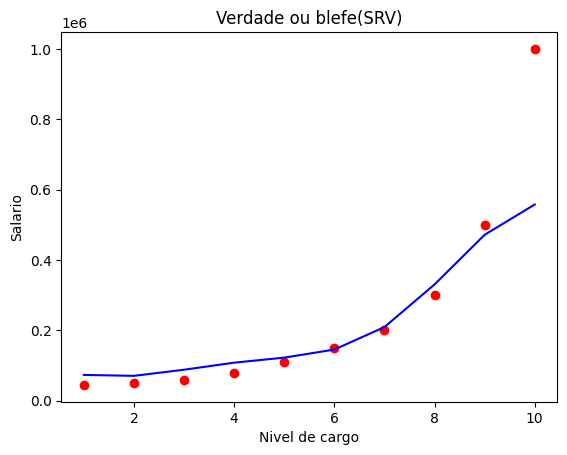

In [ ]:
plt.scatter(scX.inverse_transform(X),scy.inverse_transform(y), color='red')
plt.plot(scX.inverse_transform(X), scy.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('Verdade ou blefe(SRV)')
plt.xlabel('Nivel de cargo')
plt.ylabel('Salario')
plt.show()




# Visualização dos resultados (melhor resolucao da curva)

<ipython-input-44-bb02b5491a1c>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(scX.inverse_transform(X)), max(scX.inverse_transform(X)), 0.1)


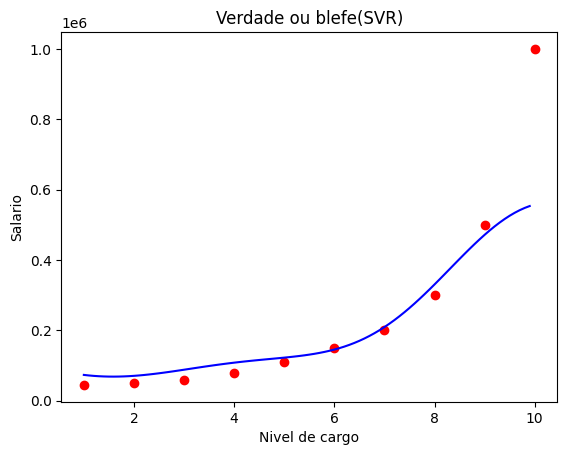

In [ ]:
X_grid = np.arange(min(scX.inverse_transform(X)), max(scX.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scX.inverse_transform(X), scy.inverse_transform(y), color='red')
plt.plot(X_grid, scy.inverse_transform(regressor.predict(scX.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title('Verdade ou blefe(SVR)')
plt.xlabel('Nivel de cargo')
plt.ylabel('Salario')
plt.show()